># Trabalho de IA - Redes Neurais
 - Arthur Severo de Souza
 - Victor Le Roy Matos

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

~ Funções sigmoid e step ~

In [44]:
def sigmoid(x):
    if len(x) > 1:
        biggest = 0
        matrix = []
        for i in range(len(x)):
            if x[i] > biggest:
                biggest = x[i]
        for i in range(len(x)):
            if x[i] != biggest:
                matrix.append(0)
            else:
                matrix.append(1)
        return matrix
    else:
        return 1 / (1 + np.exp(-x))

def step(x):
    if len(x) > 1:
        return [1 if i >= 0 else 0 for i in x]
    else:
        return 1 if x >= 0 else 0

~ Função de teste ~

In [45]:
def perceptron_test(input_t, target, w, b, test_type):
        correct = 0
        for i in range(len(input_t)):
            d_name = input_t[i][1]
            d = [d for d in target if d[1] == d_name][0][0]
            x = np.dot(w, input_t[i][0].T) + b
            # print ('x = ' + str(x))
            if test_type == 'step':
                y = step(x)
            elif test_type == 'sigmoid':
                y = sigmoid(x)
            e = np.subtract(d, y)
            # print('e = ' + str(e) + ' d = ' + str(d) + ' y = ' + str(y))
            test = 0
            for err in e:
                if err != 0:
                    test = 1
            if test == 0:
                correct += 1
                # print("CORRETO")
        N = len(input_t)
        correct_rate = (correct/N) * 100
        return correct, correct_rate

~ Função de treino ~

In [46]:
def perceptron(epochs, inputs, targets, learning_rate, test_type):
        w = np.random.uniform(-1,1, size=(len(targets), len(inputs[0][0])))
        b = np.random.uniform(-1,1, size=(len(targets)))
        t = 0
        y = 0
        e = 0
        ve = []
        erro_total = 1
        while (t < epochs and erro_total > 0):
            erro_total = 0
            for i in range(len(inputs)):
                x = inputs[i][0]
                d_name = inputs[i][1]
                d = [d for d in targets if d[1] == d_name][0][0]
                # print('x = ' + str(x) + ' d = ' + str(d) + ' d_name = ' + str(d_name))
                out = np.dot(w, x.T) + b
                # print('saida = ' + str(saida))
                if test_type == 'step':
                    y = step(out)
                elif test_type == 'sigmoid':
                    y = sigmoid(out)
                # print('y = ' + str(y))
                e = np.subtract(d, y)
                # print('e = ' + str(e))
                e_quad = np.dot(e, e.T)
                erro_total = erro_total + e_quad
                # print('E = ' + str(erro_total))
                update_w = learning_rate * np.dot(e.reshape(len(e), 1), x.reshape(1, len(x)))
                w = w + update_w
                # print('weights = ' + str(w))
                update_b = learning_rate * e
                b = b + update_b
                # print('bias = ' + str(b))
                # print("\n")
            ve.append(erro_total)
            t += 1
        return w, b, ve

~ Definindo dados de treino e teste ~

In [47]:
def define_train_test(df):

    d_label = df[6].unique()

    d_target = []
    for i in reversed(range(d_label.size)):
        aux = []
        for j in reversed(range(d_label.size)):
            if(i == j): aux.append(1)
            else: aux.append(0)
        d_target.append( [aux, d_label[i]] )

    x_dh_aux = df.loc[df[6] == d_label[0], 0:5].values
    x_sl_aux = df.loc[df[6] == d_label[1], 0:5].values
    x_no_aux = df.loc[df[6] == d_label[2], 0:5].values

    x_dh = []
    for i in range(len(x_dh_aux)):
        x_dh.append([x_dh_aux[i], 'DH'])
    
    x_sl = []
    for i in range(len(x_sl_aux)):
        x_sl.append([x_sl_aux[i], 'SL'])
    
    x_no = []
    for i in range(len(x_no_aux)):
        x_no.append([x_no_aux[i], 'NO'])
    
    size_train_dh = int(len(x_dh) * 0.7)
    size_train_sl = int(len(x_sl) * 0.7)
    size_train_no = int(len(x_no) * 0.7)

    random.shuffle(x_dh)
    x_dh_train = x_dh[:size_train_dh]
    x_dh_test = x_dh[size_train_dh:]

    random.shuffle(x_sl)
    x_sl_train = x_sl[:size_train_sl]
    x_sl_test = x_sl[size_train_sl:]

    random.shuffle(x_no)
    x_no_train = x_no[:size_train_no]
    x_no_test = x_no[size_train_no:]

    x_train = []
    x_train.extend(x_dh_train)
    x_train.extend(x_sl_train)
    x_train.extend(x_no_train)
    random.shuffle(x_train)

    x_test = []
    x_test.extend(x_dh_test)
    x_test.extend(x_sl_test)
    x_test.extend(x_no_test)
    random.shuffle(x_test)

    return x_train, x_test, d_target

~ Main ~

weight_step = [[ -40.47532373  -88.55638928   10.24791434   47.5975912     8.86808187
  -113.62440538]
 [   8.0006492   -11.13085633  -34.8440229    20.16198497  -30.33441308
   180.67464049]
 [  36.10387808   71.82905533  -43.84694366  -34.92727523   10.66383772
   -73.65844497]]
bias_step = [-19.1374614   -4.42516541  14.51539108]
correct_step = 57
correct_rate_step = 61.29032258064516


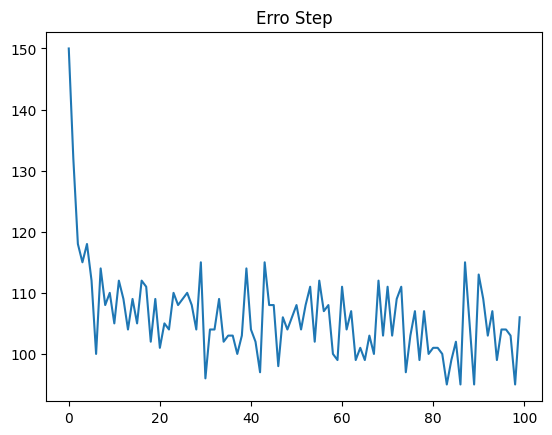



weight_sigmoid = [[ -42.99061921  -97.14211074   45.50183368   55.47277552   18.5610279
  -180.13164808]
 [  13.26327141  -10.04896288  -42.69991914   23.93439019  -35.76346102
   251.47845628]
 [  31.31633692  107.59962539   -2.62326682  -78.48056678   17.89644256
   -71.22799212]]
bias_sigmoid = [-13.87248665  -2.62334331  16.5595569 ]
correct_sigmoid = 75
correct_rate_sigmoid = 80.64516129032258


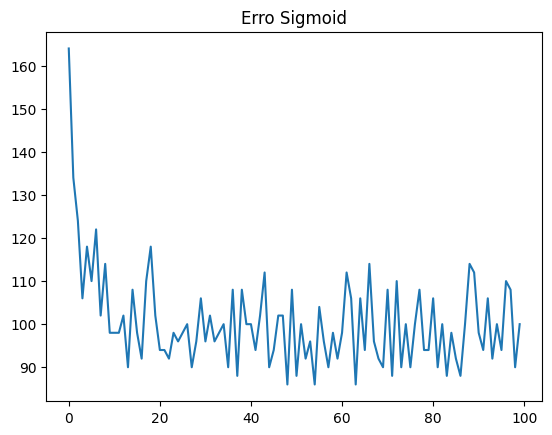

In [48]:
df_path = 'data/'
df = pd.read_csv(df_path + 'column_3C.dat', sep=' ', header=None)
# print(df)
x_train, x_test, d_target = define_train_test(df)

epochs = 100
learning_rate = 0.1

weight_step, bias_step, err_step  = perceptron(epochs, x_train, d_target, learning_rate, 'step')
print('weight_step = ' + str(weight_step))
print('bias_step = ' + str(bias_step))
correct_step, correct_rate_step = perceptron_test(x_test, d_target, weight_step, bias_step, 'step')
print('correct_step = ' + str(correct_step))
print('correct_rate_step = ' + str(correct_rate_step))

plt.plot(err_step, label='Erro')
plt.title('Erro Step')
plt.show()

print('\n')

weight_sigmoid, bias_sigmoid, err_sigmoid = perceptron(epochs, x_train, d_target, learning_rate, 'sigmoid')
print('weight_sigmoid = ' + str(weight_sigmoid))
print('bias_sigmoid = ' + str(bias_sigmoid))
correct_sigmoid, correct_rate_sigmoid = perceptron_test(x_test, d_target, weight_sigmoid, bias_sigmoid, 'sigmoid')
print('correct_sigmoid = ' + str(correct_sigmoid))
print('correct_rate_sigmoid = ' + str(correct_rate_sigmoid))

plt.plot(err_sigmoid, label='Erro')
plt.title('Erro Sigmoid')
plt.show()